In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [85]:
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [87]:
data = data.dropna()
features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']
x = data[features]
y = data['price']
x.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2


In [88]:
x_encoded = pd.get_dummies(x,columns=['cut', 'color', 'clarity'], drop_first=True)
x_encoded.head()

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(x_encoded,y,test_size=0.2,random_state=42)

In [90]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

In [91]:
mae = mean_absolute_error(ytest,y_pred)
mse = mean_squared_error(ytest,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,y_pred)
adj_r2 = 1 - (1-r2) * (len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
print(f"\nLinear Model: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}, Adjusted R²={adj_r2:.2f}")


Linear Model: MAE=737.15, MSE=1288705.48, RMSE=1135.21, R²=0.92, Adjusted R²=0.92


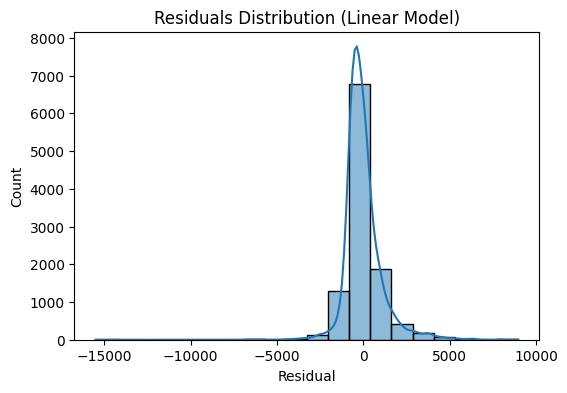

In [92]:
plt.figure(figsize=(6,4))
sns.histplot(ytest - y_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Linear Model)')
plt.xlabel('Residual')
plt.show()

In [93]:
xtrainsample = xtrain.sample(n=5000,random_state=42)
ytrainsample = ytrain.loc[xtrainsample.index]
xtestsample = xtest.sample(n=1000,random_state=42)
ytestsample = ytest.loc[xtestsample.index]

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly.fit_transform(xtrainsample)
x_poly_test = poly.transform(xtestsample)

lr_poly = LinearRegression()
lr_poly.fit(x_poly_train,ytrainsample)
y_poly_pred = lr_poly.predict(x_poly_test)

In [94]:
# ## 9. Polynomial Model Evaluation
mae_poly = mean_absolute_error(ytestsample, y_poly_pred)
mse_poly = mean_squared_error(ytestsample, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(ytestsample, y_poly_pred))
r2_poly = r2_score(ytestsample, y_poly_pred)
adj_r2_poly = 1 - (1-r2_poly) * (len(ytestsample)-1)/(len(ytestsample)-x_poly_test.shape[1]-1)
print(f"\nPolynomial Model: MAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}, Adjusted R²={adj_r2_poly:.2f}")

# Linear Model: MAE=737.15, MSE=1288705.48, RMSE=1135.21, R²=0.92, Adjusted R²=0.92


Polynomial Model: MAE=450.90, MSE=1888592.83, RMSE=1374.26, R²=0.88, Adjusted R²=0.83


In [95]:
# ## 10. K-Fold Cross-Validation (Polynomial)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, x_encoded, y, cv=kf, scoring='r2')
print(f"\nCV R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.2f}")


CV R² scores: [0.91893314 0.92224842 0.91409925 0.91960294 0.92314319]
Mean CV R²: 0.92
